In [28]:
import numpy as np
import pandas as pd
# import torch
# import scipy
import matplotlib.pyplot as plt
import seaborn

import plotly.graph_objects as go
import plotly.express as px

In [29]:
raw_data = np.loadtxt('Turbine.txt').reshape(-1)
int_cast_data = np.trunc(raw_data*np.power(10,1)).astype(int).reshape(-1, 3)

In [30]:
shifted = (int_cast_data - int_cast_data.min(axis=0) + np.array([50,50,50]))

sizes = (int_cast_data.max(axis=0) - int_cast_data.min(axis=0) + 51).astype(int)
tensor_3d = np.zeros(sizes, dtype=int)

tensor_3d[shifted[:, 0], shifted[:, 1], shifted[:, 2]] = 1

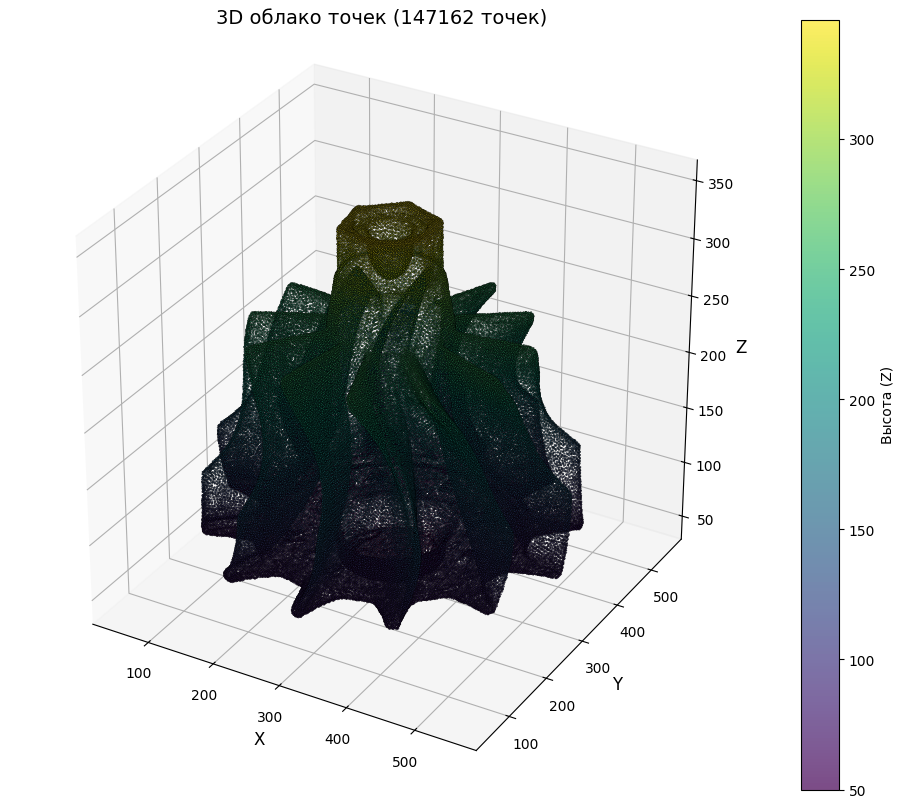

Всего точек: 147162
Размер тензора: (553, 555, 347)
Плотность: 0.001382


In [31]:
points = np.argwhere(tensor_3d != 0)
    

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, 
                    c=z,
                    cmap='viridis',
                    s=1,         
                    alpha=0.7,
                    edgecolors='k',
                    linewidth=0.5)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title(f'3D облако точек ({len(points)} точек)', fontsize=14)

plt.colorbar(scatter, ax=ax, label='Высота (Z)')

ax.set_box_aspect([1, 1, 1])

plt.show()

print(f"Всего точек: {len(points)}")
print(f"Размер тензора: {tensor_3d.shape}")
print(f"Плотность: {len(points) / np.prod(tensor_3d.shape):.6f}")

In [19]:
points = np.argwhere(tensor_3d != 0)
    
title = "Облако точек"
    
x, y, z = points[:, 0], points[:, 1], points[:, 2]

colors = z

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=colors,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title="Z")
    ),
    text=[f'({xi}, {yi}, {zi})' for xi, yi, zi in points],
    hovertemplate='<b>Координаты</b>: %{text}<br>' +
                  '<b>Z</b>: %{z}<extra></extra>'
)])

fig.update_layout(
    title=dict(text=title, font=dict(size=20)),
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data' 
    ),
    width=1000,
    height=800,
    hovermode='closest'
)

# fig.show()

fig.write_html("3d_cloud.html")

In [89]:
tensor_3d[:,:, 10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

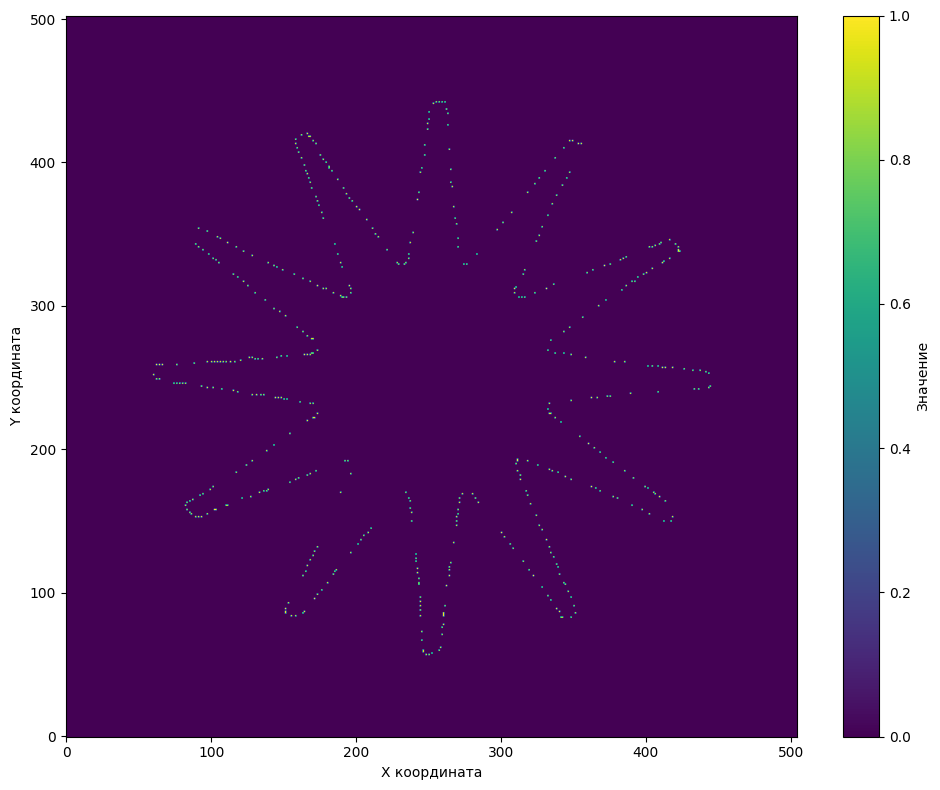

In [103]:
tensor_slice = tensor_3d[:,:, 150]

plt.figure(figsize=(10, 8))
    
plt.imshow(tensor_slice, 
           cmap='viridis', 
           aspect='auto',
           origin='lower')  

plt.colorbar(label='Значение')
plt.xlabel('X координата')
plt.ylabel('Y координата')

# plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
    